This program is intended to make predictions/associations * regarding the variable partY and partY2 with the brainsize.csv dataset. 

In [342]:
import pandas
import numpy as np
# First, we need to load the data and to make it readable
csvfile = ('/Users/Admin/Documents/BrainHack2020/course-2020-assessments/practical/brainsize.csv')
data = pandas.read_csv(csvfile, sep=';', index_col=0)
# We can look at the first few rows of the data set
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118,64.5,816932
2,Male,140,150,124,.,72.5,1001121
3,Male,139,123,150,143,73.3,1038437
4,Male,133,129,128,172,68.8,965353
5,Female,137,132,134,147,65.0,951545


In [343]:
# Then, we can look at the type of data we have
print('What type is data ? : ', type(data))
print("It stores values in a numpy array:", type(data.values))
data.values[:]
# As we can see, we have 40 observations and 7 variables 


What type is data ? :  <class 'pandas.core.frame.DataFrame'>
It stores values in a numpy array: <class 'numpy.ndarray'>


array([['Female', 133, 132, 124, '118', '64.5', 816932],
       ['Male', 140, 150, 124, '.', '72.5', 1001121],
       ['Male', 139, 123, 150, '143', '73.3', 1038437],
       ['Male', 133, 129, 128, '172', '68.8', 965353],
       ['Female', 137, 132, 134, '147', '65.0', 951545],
       ['Female', 99, 90, 110, '146', '69.0', 928799],
       ['Female', 138, 136, 131, '138', '64.5', 991305],
       ['Female', 92, 90, 98, '175', '66.0', 854258],
       ['Male', 89, 93, 84, '134', '66.3', 904858],
       ['Male', 133, 114, 147, '172', '68.8', 955466],
       ['Female', 132, 129, 124, '118', '64.5', 833868],
       ['Male', 141, 150, 128, '151', '70.0', 1079549],
       ['Male', 135, 129, 124, '155', '69.0', 924059],
       ['Female', 140, 120, 147, '155', '70.5', 856472],
       ['Female', 96, 100, 90, '146', '66.0', 878897],
       ['Female', 83, 71, 96, '135', '68.0', 865363],
       ['Female', 132, 132, 120, '127', '68.5', 852244],
       ['Male', 100, 96, 102, '178', '73.5', 945088],
   

A quick glance at our data set allows us to see that there are some missing data, aprticularly in the Weight and Height variables. We need to identify them and mark then as NaN.

In [344]:
# This line selects missing values (here, "." values) and changes them to "nan"
data = pandas.read_csv(csvfile, sep=';', na_values=".")

# Looking again at our data set, there are no missing values anymore, they have been changed to "nan"
data.values[:] 

array([[1, 'Female', 133, 132, 124, 118.0, 64.5, 816932],
       [2, 'Male', 140, 150, 124, nan, 72.5, 1001121],
       [3, 'Male', 139, 123, 150, 143.0, 73.3, 1038437],
       [4, 'Male', 133, 129, 128, 172.0, 68.8, 965353],
       [5, 'Female', 137, 132, 134, 147.0, 65.0, 951545],
       [6, 'Female', 99, 90, 110, 146.0, 69.0, 928799],
       [7, 'Female', 138, 136, 131, 138.0, 64.5, 991305],
       [8, 'Female', 92, 90, 98, 175.0, 66.0, 854258],
       [9, 'Male', 89, 93, 84, 134.0, 66.3, 904858],
       [10, 'Male', 133, 114, 147, 172.0, 68.8, 955466],
       [11, 'Female', 132, 129, 124, 118.0, 64.5, 833868],
       [12, 'Male', 141, 150, 128, 151.0, 70.0, 1079549],
       [13, 'Male', 135, 129, 124, 155.0, 69.0, 924059],
       [14, 'Female', 140, 120, 147, 155.0, 70.5, 856472],
       [15, 'Female', 96, 100, 90, 146.0, 66.0, 878897],
       [16, 'Female', 83, 71, 96, 135.0, 68.0, 865363],
       [17, 'Female', 132, 132, 120, 127.0, 68.5, 852244],
       [18, 'Male', 100, 96, 102

In [345]:
# Looking at our data set in more detail is important so we can make educated decisions as to what analysis are appropriate
print('data.shape: ', data.shape) # This line gives us the dimension of our data set
print('data.columns: ',data.columns)  # This line tells us the name of our columns (variables)

# RETIRER AVANT DE REMETTRE print('\nFemale VIQ mean: ', data[data['Gender'] == 'Female']['VIQ'].mean())
# This line ^ can give us some means (the ones we want)
# ON POURRAIT RAJOUTER DES LIGNES À PROPOS DE ÇA UNE FOIS QUE J'AURAI CHOISIS LES VARIABLES À ASSOCIER À partY

# Show descriptive statistics
data.describe()

# We can also show these descriptive statistics without the NaN values; which reduces the count but does not seem to change the
# values by a lot in our case. To see those statistics, uncomment the following line: 
# data.dropna().describe()

data.shape:  (40, 8)
data.columns:  Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')


,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


Now that we have our basic statistics, we can start viewing our data in plots. 

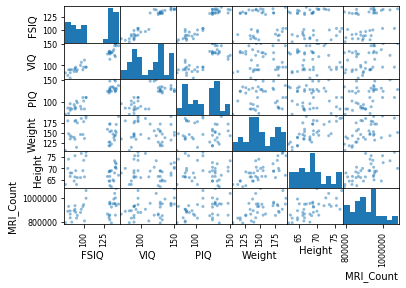

In [346]:
from pandas import plotting as pdplt
pdplt.scatter_matrix(data[['FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count']]);
# To look at the plots in more details, they can be seen one by one by uncommenting the following lines.
#pdplt.scatter_matrix(data[['FSIQ']]);
#pdplt.scatter_matrix(data[['VIQ']]);
#pdplt.scatter_matrix(data[['PIQ']]);
#pdplt.scatter_matrix(data[['Weight']]);
#pdplt.scatter_matrix(data[['Height']]);
#pdplt.scatter_matrix(data[['MRI_Count']]);


Those graphs were not that informative or good looking. Let's import seaborn to manipulate them better

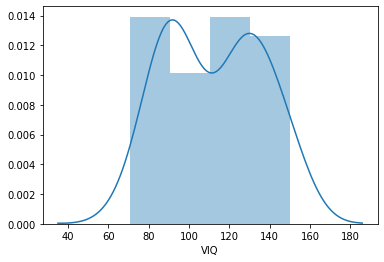

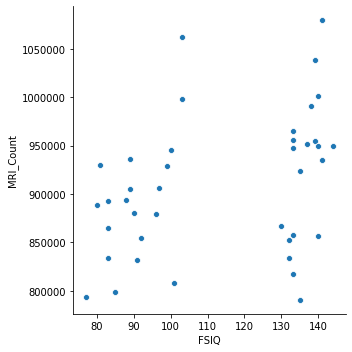

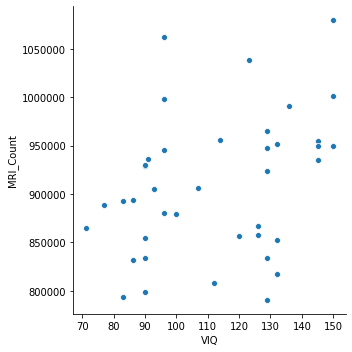

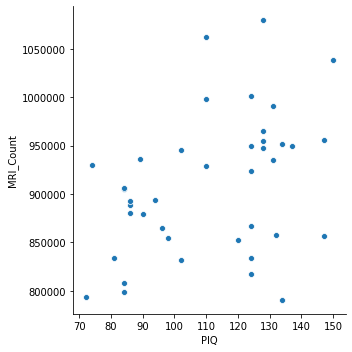

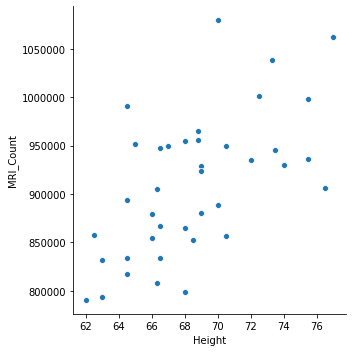

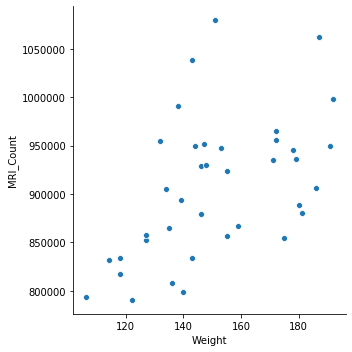

In [347]:
 
import seaborn as sns
sns.distplot(data['VIQ'],
            #bins=30,          # increase "resolution"
            #color='black',    # change color
            #kde=False,        # get rid of KDE (y axis=N)
            #rug=True,         # add "rug"
            )
sns.relplot(x="FSIQ", y="MRI_Count", data=data);
sns.relplot(x="VIQ", y="MRI_Count", data=data);
sns.relplot(x="PIQ", y="MRI_Count", data=data);
sns.relplot(x="Height", y="MRI_Count", data=data);
sns.relplot(x="Weight", y="MRI_Count", data=data);



In [348]:
# Gender needs to be converted from a string into an integer. Here, 2 genders have been identified. 

print(df.dtypes) #here, we can see that Gender is an object instead of a numeric value. 
gender = {'Male': 1,'Female': 2} 
data.Gender = [gender[item] for item in data.Gender] 
print(data) 

Unnamed: 0      int64
Gender          int64
FSIQ            int64
VIQ             int64
PIQ             int64
Weight        float64
Height        float64
MRI_Count     float64
partY         float64
dtype: object
    Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0            1       2   133  132  124   118.0    64.5     816932
1            2       1   140  150  124     NaN    72.5    1001121
2            3       1   139  123  150   143.0    73.3    1038437
3            4       1   133  129  128   172.0    68.8     965353
4            5       2   137  132  134   147.0    65.0     951545
5            6       2    99   90  110   146.0    69.0     928799
6            7       2   138  136  131   138.0    64.5     991305
7            8       2    92   90   98   175.0    66.0     854258
8            9       1    89   93   84   134.0    66.3     904858
9           10       1   133  114  147   172.0    68.8     955466
10          11       2   132  129  124   118.0    64.5     833

In [349]:
# We can now generate a random variable

import numpy
random.seed_float_array = numpy.random.rand(40, 1)
print("40 X 1 random float array in [0.0, 1.0] \n", random_float_array,"\n")
partY = random_float_array

40 X 1 random float array in [0.0, 1.0] 
 [[0.23075493]
 [0.04823285]
 [0.18130488]
 [0.6036163 ]
 [0.74861463]
 [0.16663457]
 [0.62533606]
 [0.78855126]
 [0.03975256]
 [0.28065162]
 [0.53756467]
 [0.21967565]
 [0.3506496 ]
 [0.42905677]
 [0.59459761]
 [0.04057321]
 [0.85483282]
 [0.30888815]
 [0.45138044]
 [0.72631905]
 [0.83002962]
 [0.01448271]
 [0.55887561]
 [0.82436467]
 [0.75191978]
 [0.06681034]
 [0.37142257]
 [0.18823423]
 [0.03691133]
 [0.51923411]
 [0.20454558]
 [0.99976283]
 [0.28497844]
 [0.02084039]
 [0.65814803]
 [0.12247383]
 [0.05704837]
 [0.80031072]
 [0.62200439]
 [0.40604081]] 



In [350]:
data.shape


(40, 8)

In [351]:
#print(data)

In [352]:
# Time to combine the original data set with the new variable partY
df = pandas.DataFrame(data)
df['partY'] = partY
df #and print the resulting data set


,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY
0,1,2,133,132,124,118.0,64.5,816932,0.230755
1,2,1,140,150,124,NaN,72.5,1001121,0.048233
2,3,1,139,123,150,143.0,73.3,1038437,0.181305
3,4,1,133,129,128,172.0,68.8,965353,0.603616
4,5,2,137,132,134,147.0,65.0,951545,0.748615
5,6,2,99,90,110,146.0,69.0,928799,0.166635
6,7,2,138,136,131,138.0,64.5,991305,0.625336
7,8,2,92,90,98,175.0,66.0,854258,0.788551
8,9,1,89,93,84,134.0,66.3,904858,0.039753
9,10,1,133,114,147,172.0,68.8,955466,0.280652


Task #1 is now completed; the new random variable was generated and inserted into the data set. Now, we can investigate possible associations between this variable and other variables from the brainsize dataset.

In [353]:
# let's start by separating our data set into a training set and a test set

import sklearn
import sklearn.model_selection as model_selection

#data set is separated into 2 groups; train and test. Train size is 60%, test size is 40%.
y = partY
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4, shuffle = True, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_test.fillna(X_test.mean())

(24, 9) (24, 1)
(16, 9) (16, 1)


,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY
6,7,2,138,136,131,138.000000,64.50,991305,0.625336
10,11,2,132,129,124,118.000000,64.50,833868,0.537565
12,13,1,135,129,124,155.000000,69.00,924059,0.350650
38,39,1,81,90,74,148.000000,74.00,930016,0.622004
5,6,2,99,90,110,146.000000,69.00,928799,0.166635
11,12,1,141,150,128,151.000000,70.00,1079549,0.219676
23,24,1,139,145,128,132.000000,68.00,955003,0.824365
1,2,1,140,150,124,144.285714,72.50,1001121,0.048233
13,14,2,140,120,147,155.000000,70.50,856472,0.429057
20,21,1,83,83,86,144.285714,68.24,892420,0.830030


In [356]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from numpy import inf
#Linear Regression needs values to be finite. However, MRI_Count values are considered infinite.

#convert MRI_Count from int to float
print(df.dtypes)
df['MRI_Count'] = df['MRI_Count'].astype(float)

#Stuff I tried but does not work
#Calculate exponent value for MRI_Count values
#import math
#x = df
#array_values = ['MRI_Count']
#expos = [math.exp(float(-i)/35) for i in array_values]
#other stuff I tried
#np.where(x.values >= np.finfo(np.float64).max)


#Linear Regression
clf = LinearRegression(normalize=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(r2_score(y_test,ypred))

Unnamed: 0      int64
Gender          int64
FSIQ            int64
VIQ             int64
PIQ             int64
Weight        float64
Height        float64
MRI_Count     float64
partY         float64
dtype: object


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').